In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv('SOCR-HeightWeight.csv')
df.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [53]:
df = df[['Height(Inches)', 'Weight(Pounds)']]
df.rename(columns={
    'Height(Inches)': 'Height',
    'Weight(Pounds)': 'Weight'
}, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [55]:
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [56]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [57]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

In [58]:
df.duplicated().sum()

0

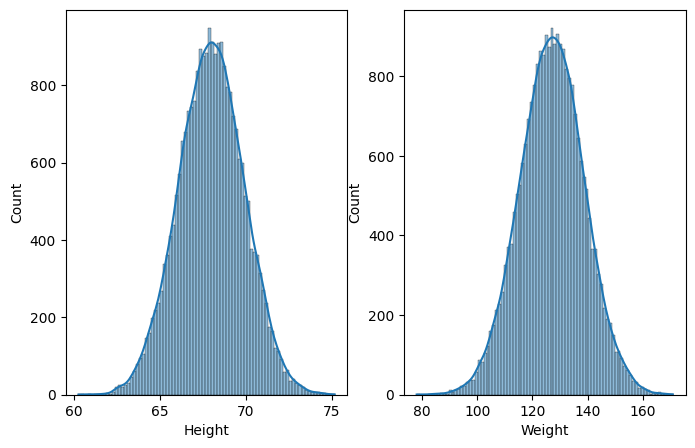

In [59]:
fig = plt.figure(figsize=(8,5))
for i in range(len(df.columns)):
    col = df.columns[i]
    sub = fig.add_subplot(1,2, i+1)
    sns.histplot(data=df, x=col, kde=True)

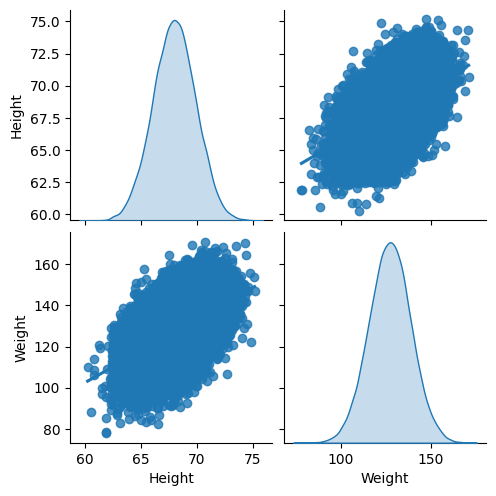

In [60]:
sns.pairplot(df[['Height', 'Weight']], diag_kind='kde', kind='reg')

<Axes: xlabel='Height', ylabel='Weight'>

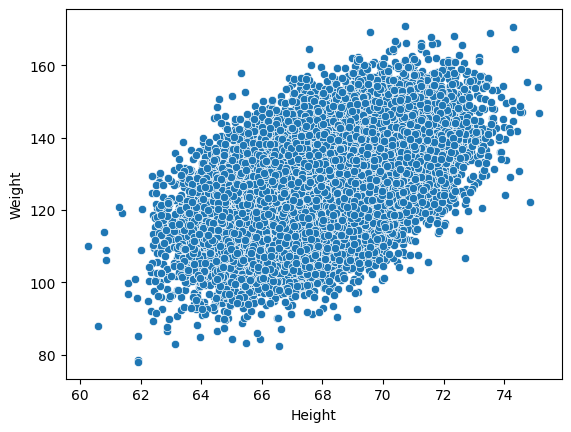

In [61]:
sns.scatterplot(data=df, x='Height', y='Weight')

In [62]:
X = df[['Weight']]
y = df[['Height']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.index

Index([23311, 23623,  1020, 12645,  1533,  3518,   483, 19370, 12667,  7403,
       ...
       16850,  6265, 22118, 11284, 11964, 21575,  5390,   860, 15795, 23654],
      dtype='int64', length=20000)

In [64]:
X_test.index

Index([ 6868, 24016,  9668, 13640, 14018,  7488,  5804, 12909,  3386,  9567,
       ...
        2315, 19003, 18389, 11917,  9136,  8670, 11839,  4013, 21147,   695],
      dtype='int64', length=5000)

In [65]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = linear.predict(X_test)

In [67]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.26055631630450127
mean_absolute_error: 1.316304056930067
mean_absolute_percentage_error: 0.019382067562299272
root_mean_squared_error: 1.6507461482811452
